In [20]:
%%time
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

CPU times: user 26 µs, sys: 5 µs, total: 31 µs
Wall time: 34.1 µs


In [21]:
%%time
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from itertools import combinations 
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

CPU times: user 34 µs, sys: 7 µs, total: 41 µs
Wall time: 45.1 µs


In [22]:
df=pd.read_csv('60s_window.csv',index_col=0)
df

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,Resp_min,Resp_max,TEMP_mean,TEMP_std,TEMP_min,TEMP_max,BVP_peak_freq,TEMP_slope,subject,label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,-8.805847,6.742859,35.807285,0.024986,35.75,35.87,0.081425,-0.000253,2,0
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,-2.914429,3.730774,35.706833,0.024641,35.66,35.75,0.147017,-0.000161,2,0
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,-3.242493,3.450012,35.775430,0.037082,35.71,35.84,0.088210,0.000535,2,0
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,-6.646729,5.216980,35.830724,0.025266,35.77,35.89,0.117614,-0.000256,2,0
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,-2.777100,3.028870,35.798869,0.020909,35.77,35.84,0.151541,0.000260,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0.036762,0.007911,0.000000,0.058485,-0.036741,0.008011,-0.058485,0.008257,-0.000025,5.512148e-06,...,-23.149109,20.591736,32.305747,0.016641,32.27,32.33,0.119876,-0.000075,17,3
781,0.032120,0.005324,0.001376,0.055732,-0.032117,0.005343,-0.055732,0.002752,-0.000022,3.676049e-06,...,-18.075562,22.718811,32.265837,0.015829,32.23,32.29,0.065592,-0.000117,17,3
782,0.026901,0.000517,0.024770,0.028210,-0.026901,0.000517,-0.028210,-0.024770,-0.000019,3.554577e-07,...,-20.307922,14.802551,32.316878,0.033005,32.23,32.37,0.108567,0.000454,17,3


In [23]:
list(df['subject'].unique())

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]

In [24]:
features=df.columns.tolist()

to_remove = [fea for fea in features if "label"  in fea ]
features = [x for x in features if x not in to_remove]
features

['net_acc_mean',
 'net_acc_std',
 'net_acc_min',
 'net_acc_max',
 'ACC_x_mean',
 'ACC_x_std',
 'ACC_x_min',
 'ACC_x_max',
 'ACC_y_mean',
 'ACC_y_std',
 'ACC_y_min',
 'ACC_y_max',
 'ACC_z_mean',
 'ACC_z_std',
 'ACC_z_min',
 'ACC_z_max',
 'BVP_mean',
 'BVP_std',
 'BVP_min',
 'BVP_max',
 'EDA_mean',
 'EDA_std',
 'EDA_min',
 'EDA_max',
 'EDA_phasic_mean',
 'EDA_phasic_std',
 'EDA_phasic_min',
 'EDA_phasic_max',
 'EDA_smna_mean',
 'EDA_smna_std',
 'EDA_smna_min',
 'EDA_smna_max',
 'EDA_tonic_mean',
 'EDA_tonic_std',
 'EDA_tonic_min',
 'EDA_tonic_max',
 'Resp_mean',
 'Resp_std',
 'Resp_min',
 'Resp_max',
 'TEMP_mean',
 'TEMP_std',
 'TEMP_min',
 'TEMP_max',
 'BVP_peak_freq',
 'TEMP_slope',
 'subject']

In [25]:

to_remove = [fea for fea in features if "label"  in fea or "subject"  in fea]
feature = [x for x in features if x not in to_remove]
len(feature)

46

In [7]:
# train=df[df['subject']<=8]
# test=df[df['subject']>8]

# X_train = train[feature]
# y_train = train['label']
# X_test = test[feature]
# y_test = test['label']

In [26]:
sm = SMOTE(random_state=2)
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
# X_test_res, y_test_res = sm.fit_sample(X_test, y_test)

In [27]:
X, y= sm.fit_sample(df[features], df['label'])

In [28]:
np.bincount(y) 

array([312, 312, 312, 312])

In [29]:
df_new=pd.concat([pd.DataFrame(X,columns=features),pd.DataFrame(y,columns=['label'])],axis=1)
df_new

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,Resp_min,Resp_max,TEMP_mean,TEMP_std,TEMP_min,TEMP_max,BVP_peak_freq,TEMP_slope,subject,label
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,-8.805847,6.742859,35.807285,0.024986,35.750000,35.870000,0.081425,-0.000253,2.000000,0
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,-2.914429,3.730774,35.706833,0.024641,35.660000,35.750000,0.147017,-0.000161,2.000000,0
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,-3.242493,3.450012,35.775430,0.037082,35.710000,35.840000,0.088210,0.000535,2.000000,0
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,-6.646729,5.216980,35.830724,0.025266,35.770000,35.890000,0.117614,-0.000256,2.000000,0
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,-2.777100,3.028870,35.798869,0.020909,35.770000,35.840000,0.151541,0.000260,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,0.042130,0.000328,0.040968,0.043696,-0.039802,0.000328,-0.041346,-0.038618,-0.000027,2.254555e-07,...,-10.510088,8.729651,31.505537,0.015360,31.483510,31.544919,0.164873,-0.000189,11.176097,3
1244,0.039764,0.000271,0.039219,0.039907,0.039764,0.000271,0.039219,0.039907,0.000027,1.862190e-07,...,-9.202333,7.398872,33.696923,0.019939,33.660000,33.741212,0.131407,-0.000133,13.000000,3
1245,0.041990,0.000231,0.039308,0.043921,0.003807,0.000231,0.001499,0.006112,0.000003,1.590967e-07,...,-8.508980,6.769601,33.929413,0.014302,33.889531,33.958050,0.142617,-0.000093,9.166227,3
1246,0.040894,0.000132,0.040569,0.041733,0.040894,0.000132,0.040569,0.041733,0.000028,9.076908e-08,...,-8.100251,8.296914,32.774272,0.021280,32.740925,32.847081,0.137624,0.000187,5.346098,3


In [30]:
for i in range(len(list(df_new['subject']))):
    df_new['subject'][i]=min([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17], key=lambda x:abs(x-list(df_new['subject'])[i])) 


/home/sf/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
df_new['subject']=df_new['subject'].astype(int)

In [32]:
df_new['subject'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17])

In [33]:
train=df_new[df_new['subject']<=9]
test=df_new[df_new['subject']>9]

In [34]:
scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(train[feature])
scaled_data_test = scaler.fit_transform(test[feature])


et = ExtraTreesClassifier(n_estimators=50, n_jobs=10)
et.fit(scaled_data_train,train['label'])
y_pred=et.predict(scaled_data_test)
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       147
           1       0.90      0.80      0.85       161
           2       0.50      0.66      0.57       147
           3       0.67      0.53      0.59       150

    accuracy                           0.67       605
   macro avg       0.68      0.66      0.67       605
weighted avg       0.69      0.67      0.67       605



In [35]:
%%time
scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[feature])
scaled_data_test = scaler.fit_transform(test[feature])
et = ExtraTreesClassifier(n_estimators=50, n_jobs=10)
et.fit(scaled_data_train,train['label'])
y_pred=et.predict(scaled_data_test)
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.80      0.59      0.67       147
           1       0.71      0.94      0.81       161
           2       0.55      0.59      0.57       147
           3       0.68      0.57      0.62       150

    accuracy                           0.68       605
   macro avg       0.68      0.67      0.67       605
weighted avg       0.68      0.68      0.67       605

CPU times: user 203 ms, sys: 93.9 ms, total: 296 ms
Wall time: 235 ms


In [36]:
et = ExtraTreesClassifier(n_estimators=50, n_jobs=10,)
et.fit(train[feature],train['label'])
y_pred=et.predict(test[feature])
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.66      0.44      0.53       147
           1       0.79      0.87      0.83       161
           2       0.56      0.58      0.57       147
           3       0.61      0.71      0.66       150

    accuracy                           0.66       605
   macro avg       0.65      0.65      0.64       605
weighted avg       0.66      0.66      0.65       605



In [37]:
%%time
et = ExtraTreesClassifier(n_estimators=50, n_jobs=10, verbose=2)
et.fit(X_train_res,y_train_res)

NameError: name 'X_train_res' is not defined

In [335]:
%%time
et = ExtraTreesClassifier(n_estimators=50, n_jobs=10, verbose=2)
et.fit(train[feature],train['label'])

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:    0.1s finished


building tree 1 of 50building tree 2 of 50building tree 3 of 50building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50building tree 8 of 50


building tree 9 of 50

building tree 10 of 50

building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50building tree 15 of 50

building tree 16 of 50
building tree 17 of 50building tree 18 of 50

building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=10,
                     oob_score=False, random_state=None, verbose=2,
                     warm_start=False)

In [360]:
clf1 = ExtraTreesClassifier(n_estimators=50, n_jobs=10, verbose=1,random_state=0)
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier(n_estimators=10)
clf4 = XGBClassifier()

In [371]:
sclf = StackingClassifier(classifiers=[clf4,  clf1], meta_classifier=clf3)

In [369]:
for clf, label in zip([clf1, clf2, clf3, sclf], ['ExtraTreesClassifier','DecisionTreeClassifier','RandomForestClassifier']):

    scores = model_selection.cross_val_score(clf, train[features], train['label'],cv=10, scoring='accuracy')
    
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      |

Accuracy: 0.90 (+/- 0.06) [ExtraTreesClassifier]
Accuracy: 0.79 (+/- 0.09) [DecisionTreeClassifier]
Accuracy: 0.87 (+/- 0.06) [RandomForestClassifier]


In [372]:
sclf.fit( train[feature],  train['label'])
y_pred=sclf.predict(test[feature])
print(classification_report(test['label'],y_pred))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           0       0.66      0.39      0.49       147
           1       0.78      0.83      0.81       161
           2       0.59      0.65      0.61       147
           3       0.56      0.69      0.61       150

    accuracy                           0.64       605
   macro avg       0.65      0.64      0.63       605
weighted avg       0.65      0.64      0.64       605



[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:    0.0s finished


In [312]:
y_pred=sclf.predict(test['label'])
print(classification_report(test['label'],y_pred))

ValueError: Number of features of the model must match the input. Model n_features is 48 and input n_features is 605 

In [374]:
from sklearn.svm import SVC
svm = SVC(kernel='poly', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit( train[feature],  train['label'])
y_pred=svm.predict(test[feature])
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.43      0.57      0.49       147
           1       0.70      0.70      0.70       161
           2       0.42      0.33      0.37       147
           3       0.58      0.51      0.54       150

    accuracy                           0.53       605
   macro avg       0.53      0.53      0.52       605
weighted avg       0.54      0.53      0.53       605



In [359]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit( train[feature],  train['label'])
y_pred=model.predict(test[feature])
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.75      0.54      0.63       147
           1       0.88      0.78      0.83       161
           2       0.57      0.71      0.63       147
           3       0.63      0.72      0.67       150

    accuracy                           0.69       605
   macro avg       0.71      0.69      0.69       605
weighted avg       0.71      0.69      0.69       605



In [336]:
%%time
y_pred=et.predict(test[feature])

CPU times: user 50.5 ms, sys: 1.59 ms, total: 52.1 ms
Wall time: 107 ms


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:    0.0s finished


In [337]:
%%time
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.79      0.59      0.68       147
           1       0.75      0.91      0.82       161
           2       0.60      0.68      0.63       147
           3       0.70      0.61      0.65       150

    accuracy                           0.70       605
   macro avg       0.71      0.70      0.70       605
weighted avg       0.71      0.70      0.70       605

CPU times: user 5.85 ms, sys: 54 µs, total: 5.91 ms
Wall time: 4.74 ms


In [ ]:
           0       0.73      0.55      0.63       147
           1       0.89      0.88      0.88       161
           2       0.53      0.80      0.63       147
           3       0.75      0.57      0.64       150

    accuracy                           0.70       605
   macro avg       0.72      0.70      0.70       605
weighted avg       0.73      0.70      0.70       605

In [243]:
%%time
y_pred=et.predict(X_test_res)

ValueError: Number of features of the model must match the input. Model n_features is 46 and input n_features is 47 

In [170]:
%%time
print(classification_report(y_test_res,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.54      0.59       168
           1       0.72      0.95      0.82       168
           2       0.53      0.15      0.23       168
           3       0.51      0.80      0.62       168

    accuracy                           0.61       672
   macro avg       0.60      0.61      0.57       672
weighted avg       0.60      0.61      0.57       672

CPU times: user 5.91 ms, sys: 120 µs, total: 6.03 ms
Wall time: 4.45 ms


In [80]:
et.feature_importances_

array([0.02763924, 0.00884209, 0.03382173, 0.01837484, 0.02394089,
       0.00875603, 0.01667229, 0.01530304, 0.02401515, 0.01022684,
       0.01777898, 0.01683037, 0.02152285, 0.01002841, 0.01969484,
       0.01637563, 0.00254085, 0.01140942, 0.01074339, 0.0093354 ,
       0.05118239, 0.00432433, 0.05112299, 0.05011299, 0.01265779,
       0.01077112, 0.01138274, 0.01408509, 0.0052504 , 0.00441432,
       0.00149352, 0.00378826, 0.06773331, 0.01048411, 0.08070434,
       0.08505767, 0.00247955, 0.00516083, 0.00339077, 0.00296881,
       0.06256175, 0.00134438, 0.06504994, 0.06096728, 0.00658133,
       0.00107774])

In [65]:
df_new

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,Resp_min,Resp_max,TEMP_mean,TEMP_std,TEMP_min,TEMP_max,BVP_peak_freq,TEMP_slope,subject,label
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,-8.805847,6.742859,35.807285,0.024986,35.750000,35.870000,0.081425,-0.000253,2,0
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,-2.914429,3.730774,35.706833,0.024641,35.660000,35.750000,0.147017,-0.000161,2,0
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,-3.242493,3.450012,35.775430,0.037082,35.710000,35.840000,0.088210,0.000535,2,0
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,-6.646729,5.216980,35.830724,0.025266,35.770000,35.890000,0.117614,-0.000256,2,0
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,-2.777100,3.028870,35.798869,0.020909,35.770000,35.840000,0.151541,0.000260,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,0.042130,0.000328,0.040968,0.043696,-0.039802,0.000328,-0.041346,-0.038618,-0.000027,2.254555e-07,...,-10.510088,8.729651,31.505537,0.015360,31.483510,31.544919,0.164873,-0.000189,11,3
1244,0.039764,0.000271,0.039219,0.039907,0.039764,0.000271,0.039219,0.039907,0.000027,1.862190e-07,...,-9.202333,7.398872,33.696923,0.019939,33.660000,33.741212,0.131407,-0.000133,13,3
1245,0.041990,0.000231,0.039308,0.043921,0.003807,0.000231,0.001499,0.006112,0.000003,1.590967e-07,...,-8.508980,6.769601,33.929413,0.014302,33.889531,33.958050,0.142617,-0.000093,9,3
1246,0.040894,0.000132,0.040569,0.041733,0.040894,0.000132,0.040569,0.041733,0.000028,9.076908e-08,...,-8.100251,8.296914,32.774272,0.021280,32.740925,32.847081,0.137624,0.000187,5,3


In [66]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(32, input_dim=46))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(18))
model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('relu'))

model.add(Dense(4))
model.add(Activation('softmax'))

In [67]:
df_new = pd.concat([df_new,pd.get_dummies(df_new['label'])],axis=1)
#df_new.drop(['label'],axis=1, inplace=True)
df_new


,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,TEMP_min,TEMP_max,BVP_peak_freq,TEMP_slope,subject,label,0,1,2,3
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,35.750000,35.870000,0.081425,-0.000253,2,0,1,0,0,0
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,35.660000,35.750000,0.147017,-0.000161,2,0,1,0,0,0
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,35.710000,35.840000,0.088210,0.000535,2,0,1,0,0,0
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,35.770000,35.890000,0.117614,-0.000256,2,0,1,0,0,0
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,35.770000,35.840000,0.151541,0.000260,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,0.042130,0.000328,0.040968,0.043696,-0.039802,0.000328,-0.041346,-0.038618,-0.000027,2.254555e-07,...,31.483510,31.544919,0.164873,-0.000189,11,3,0,0,0,1
1244,0.039764,0.000271,0.039219,0.039907,0.039764,0.000271,0.039219,0.039907,0.000027,1.862190e-07,...,33.660000,33.741212,0.131407,-0.000133,13,3,0,0,0,1
1245,0.041990,0.000231,0.039308,0.043921,0.003807,0.000231,0.001499,0.006112,0.000003,1.590967e-07,...,33.889531,33.958050,0.142617,-0.000093,9,3,0,0,0,1
1246,0.040894,0.000132,0.040569,0.041733,0.040894,0.000132,0.040569,0.041733,0.000028,9.076908e-08,...,32.740925,32.847081,0.137624,0.000187,5,3,0,0,0,1


In [68]:
train=df_new[df_new['subject']<=9]
test=df_new[df_new['subject']>9]

In [387]:
# model = Sequential()
# model.add(Dense(12, input_dim=8, activation='adam'))
# model.add(Dense(8, activation='adam'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='relu', metrics=['accuracy'])

In [69]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
train[0]

0       1
1       1
2       1
3       1
4       1
       ..
1238    0
1239    0
1245    0
1246    0
1247    0
Name: 0, Length: 643, dtype: uint8

In [109]:
model.fit(train[feature],train[[0,1,2,3]] , epochs=200, batch_size=1)

Epoch 1/200
643/643 [==============================] - 1s 2ms/step - loss: 1.5565 - acc: 0.5241
Epoch 2/200
643/643 [==============================] - 1s 2ms/step - loss: 0.9252 - acc: 0.6796
Epoch 3/200
643/643 [==============================] - 1s 2ms/step - loss: 0.3838 - acc: 0.8585
Epoch 4/200
643/643 [==============================] - 1s 2ms/step - loss: 0.8309 - acc: 0.8212
Epoch 5/200
643/643 [==============================] - 1s 2ms/step - loss: 0.3716 - acc: 0.8771
Epoch 6/200
643/643 [==============================] - 1s 2ms/step - loss: 0.2488 - acc: 0.9300
Epoch 7/200
643/643 [==============================] - 1s 2ms/step - loss: 0.1932 - acc: 0.9440
Epoch 8/200
643/643 [==============================] - 1s 2ms/step - loss: 0.1556 - acc: 0.9580
Epoch 9/200
643/643 [==============================] - 1s 2ms/step - loss: 0.8010 - acc: 0.7434
Epoch 10/200
643/643 [==============================] - 1s 2ms/step - loss: 0.4303 - acc: 0.8445
Epoch 11/200
643/643 [=================

643/643 [==============================] - 1s 2ms/step - loss: 0.6280 - acc: 0.7589
Epoch 169/200
643/643 [==============================] - 1s 2ms/step - loss: 0.5329 - acc: 0.7994
Epoch 170/200
643/643 [==============================] - 1s 2ms/step - loss: 0.6370 - acc: 0.7558
Epoch 171/200
643/643 [==============================] - 1s 2ms/step - loss: 0.5239 - acc: 0.7963
Epoch 172/200
643/643 [==============================] - 1s 2ms/step - loss: 0.5164 - acc: 0.8040
Epoch 173/200
643/643 [==============================] - 1s 2ms/step - loss: 0.5914 - acc: 0.8103
Epoch 174/200
643/643 [==============================] - 1s 2ms/step - loss: 0.5059 - acc: 0.8165
Epoch 175/200
643/643 [==============================] - 1s 2ms/step - loss: 0.6088 - acc: 0.7589
Epoch 176/200
643/643 [==============================] - 1s 2ms/step - loss: 0.4778 - acc: 0.8429
Epoch 177/200
643/643 [==============================] - 1s 2ms/step - loss: 0.5751 - acc: 0.8180
Epoch 178/200
643/643 [===========

In [105]:
# %%time
# y_pred= model.predict(X_test)
# print(classification_report(y_test, y_pred))

In [106]:
y_pred= model.predict(test[feature])
y_pred

array([[3.78211588e-01, 1.89585760e-02, 5.68590820e-01, 3.42390426e-02],
       [5.91818213e-01, 9.71862208e-03, 3.81879598e-01, 1.65835693e-02],
       [9.67559040e-01, 3.42960731e-04, 3.20831798e-02, 1.49345624e-05],
       ...,
       [8.06114972e-02, 1.52870305e-02, 3.49825472e-01, 5.54275990e-01],
       [1.26814755e-21, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.49510663e-11, 0.00000000e+00, 2.35323795e-24, 1.00000000e+00]],
      dtype=float32)

In [107]:
y_pred_cnv = []
for i in y_pred:
#     print (i.index(max(i)))
    result = np.where(i == np.amax(i))
    y_pred_cnv.append(result[0][0])

In [108]:
print(classification_report(test['label'], y_pred_cnv))

              precision    recall  f1-score   support

           0       0.74      0.37      0.50       147
           1       0.00      0.00      0.00       161
           2       0.38      0.35      0.36       147
           3       0.29      0.76      0.42       150

    accuracy                           0.37       605
   macro avg       0.35      0.37      0.32       605
weighted avg       0.34      0.37      0.31       605



/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [92]:
test['label']

413     0
414     0
415     0
416     0
417     0
       ..
1240    3
1241    3
1242    3
1243    3
1244    3
Name: label, Length: 605, dtype: int64

In [93]:
len(y_pred_cnv)

605

In [94]:
len(y_pred)

605

In [119]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=1)

# Fitting the model
classifier.fit(train[feature], train['label'])

# Predicting the Test set results
y_pred = classifier.predict(test[feature])

In [120]:
accuracy = accuracy_score( test['label'], y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 47.27 %.


In [114]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=1)
    scores = cross_val_score(knn,train[feature], train['label'], cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

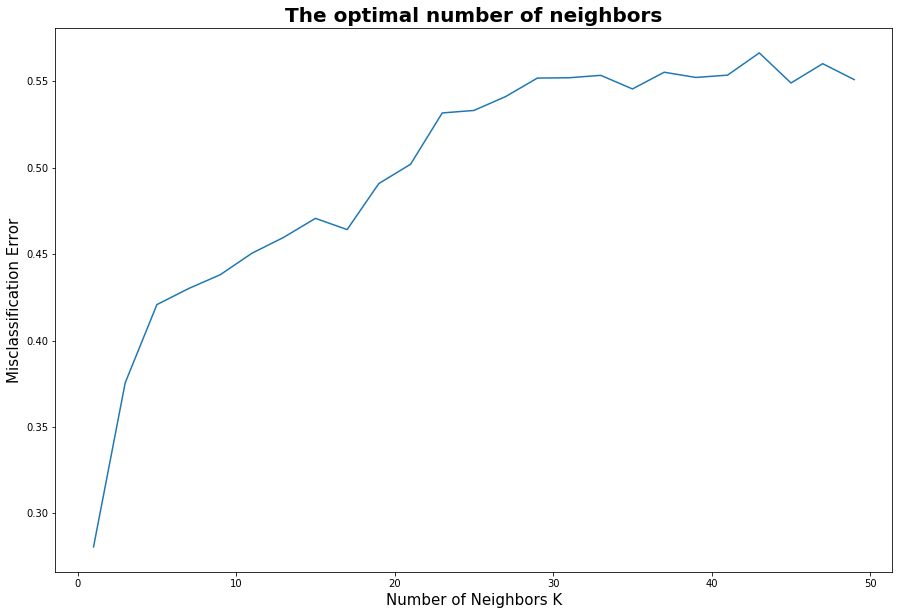

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [118]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 1.


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

model = Sequential()

# Embedding layer
model.add(
    Embedding(input_dim=num_words,
              input_length = training_length,
              output_dim=100,
              weights=[embedding_matrix],
              trainable=False,
              mask_zero=True))

# Masking layer for pre-trained embeddings
model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_words, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [190]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pri= pca.fit_transform(df_new[feature])

In [191]:
pri_df = pd.DataFrame(data = pri)

In [192]:
pri_df['label']=df_new['label']
pri_df['subject']=df_new['subject']

In [193]:
pri_df

,0,1,2,3,4,5,label,subject
0,355.703333,161.695543,-29.601887,-4.555489,15.444845,1.812838,0,2
1,46.356853,-33.122912,3.650295,-9.073137,1.521089,2.876832,0,2
2,206.353186,32.211138,6.270031,-10.922045,1.322663,2.017480,0,2
3,436.441082,-166.672579,2.617984,-7.945180,4.248592,0.115255,0,2
4,-128.977463,23.441992,6.039927,-9.034971,0.577453,2.403714,0,2
...,...,...,...,...,...,...,...,...
1243,-282.407709,-0.857713,1.583712,2.874818,-2.141742,1.283678,3,11
1244,-203.168126,-22.727117,-18.428431,0.526973,-3.126724,5.530540,3,13
1245,-194.919006,-7.388183,-14.672750,-1.706346,-1.636393,1.581972,3,9
1246,-180.660972,-26.678439,4.898846,-0.379967,-0.813657,0.070765,3,5


In [194]:
train=pri_df[pri_df['subject']<=9]
test=pri_df[pri_df['subject']>9]

In [173]:
train[[0,1,2]]

,0,1,2
0,355.703333,161.695543,-29.601887
1,46.356853,-33.122912,3.650295
2,206.353186,32.211138,6.270031
3,436.441082,-166.672579,2.617984
4,-128.977463,23.441992,6.039927
...,...,...,...
1238,-229.751879,-6.792178,-9.323451
1239,-116.799906,57.486178,1.185857
1245,-194.919006,-7.388183,-14.672750
1246,-180.660972,-26.678439,4.898846


In [195]:
%%time
et = ExtraTreesClassifier(n_estimators=50, n_jobs=10, verbose=2)
et.fit(train[[0,1,2,3,4,5]],train['label'])

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:    0.1s finished


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50building tree 12 of 50

building tree 13 of 50
building tree 14 of 50building tree 15 of 50
building tree 16 of 50
building tree 17 of 50

building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50building tree 23 of 50

building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50building tree 34 of 50
building tree 35 of 50

building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=10,
                     oob_score=False, random_state=None, verbose=2,
                     warm_start=False)

In [196]:
%%time
y_pred= et.predict(test[[0,1,2,3,4,5]])
print(classification_report(test['label'], y_pred))

              precision    recall  f1-score   support

           0       0.58      0.34      0.43       147
           1       0.47      0.73      0.57       161
           2       0.57      0.42      0.49       147
           3       0.54      0.58      0.56       150

    accuracy                           0.52       605
   macro avg       0.54      0.52      0.51       605
weighted avg       0.54      0.52      0.51       605

CPU times: user 30.9 ms, sys: 25.9 ms, total: 56.8 ms
Wall time: 112 ms


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:    0.0s finished


In [151]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.93812302 0.05900392 0.00183012]


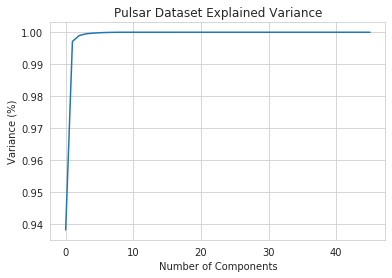

In [147]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()